<a href="https://colab.research.google.com/github/Sarwannandh67/Innofusionn-26/blob/main/Network_Security_Analysis_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
from google.colab import files
uploaded = files.upload()


Saving cybersecurity_attacks.csv to cybersecurity_attacks.csv


In [3]:
import pandas as pd

df = pd.read_csv("cybersecurity_attacks.csv")
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df = df.drop('timestamp', axis=1)

KeyError: 'timestamp'

In [10]:
# Convert Timestamp into useful feature
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df = df.drop('Timestamp', axis=1)


KeyError: 'Timestamp'

In [5]:
df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [11]:
print(df.columns)


Index(['Source IP Address', 'Destination IP Address', 'Source Port',
       'Destination Port', 'Protocol', 'Packet Length', 'Packet Type',
       'Traffic Type', 'Payload Data', 'Malware Indicators', 'Anomaly Scores',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
       'Severity Level', 'User Information', 'Device Information',
       'Network Segment', 'Geo-location Data', 'Proxy Information',
       'Firewall Logs', 'IDS/IPS Alerts', 'Log Source', 'Hour'],
      dtype='object')


In [12]:
df = df.drop([
    'Source IP Address',
    'Destination IP Address',
    'Payload Data',
    'User Information',
    'Device Information',
    'Geo-location Data',
    'Attack Signature',
    'Firewall Logs',
    'IDS/IPS Alerts',
    'Proxy Information',
    'Malware Indicators',
    'Alerts/Warnings'
], axis=1, errors='ignore')


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    if col != 'Attack Type':
        df[col] = le.fit_transform(df[col])


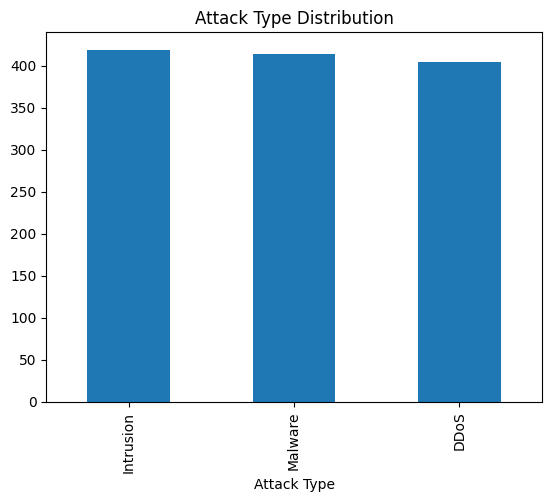

In [14]:
import matplotlib.pyplot as plt

df['Attack Type'].value_counts().plot(kind='bar')
plt.title("Attack Type Distribution")
plt.show()


In [15]:
X = df.drop('Attack Type', axis=1)
y = df['Attack Type']


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200)

In [18]:
from sklearn.metrics import classification_report

pred = model.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

        DDoS       0.33      0.31      0.32        83
   Intrusion       0.23      0.24      0.24        82
     Malware       0.31      0.31      0.31        83

    accuracy                           0.29       248
   macro avg       0.29      0.29      0.29       248
weighted avg       0.29      0.29      0.29       248



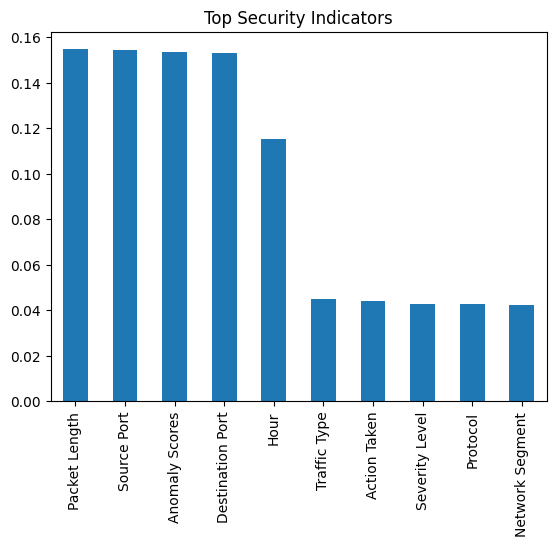

In [19]:
import pandas as pd

importance = model.feature_importances_
feat_imp = pd.Series(importance, index=X.columns).sort_values(ascending=False)

feat_imp.head(10).plot(kind='bar')
plt.title("Top Security Indicators")
plt.show()


In [20]:
print(df.shape)
print(df.head())


(1237, 13)
     Source Port  Destination Port  Protocol  Packet Length  Packet Type  \
2          16811             53600         2            306            0   
7          34489             20396         0           1022            1   
46         25022              6593         1            554            0   
97         19199             27928         0           1178            1   
105        42864             48696         0            765            0   

     Traffic Type  Anomaly Scores Attack Type  Action Taken  Severity Level  \
2               2           87.42        DDoS             1               1   
7               0           54.05   Intrusion             2               0   
46              0           97.82     Malware             0               0   
97              2            5.39     Malware             1               0   
105             0           47.31   Intrusion             0               1   

     Network Segment  Log Source  Hour  
2               

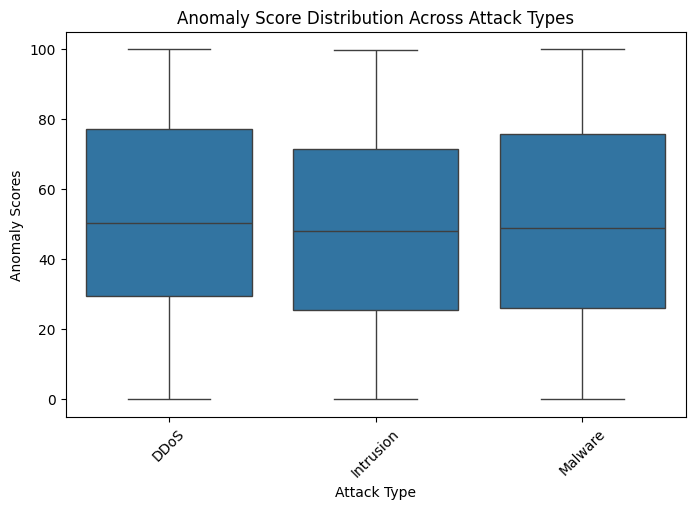

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='Attack Type', y='Anomaly Scores', data=df)
plt.xticks(rotation=45)
plt.title("Anomaly Score Distribution Across Attack Types")
plt.show()


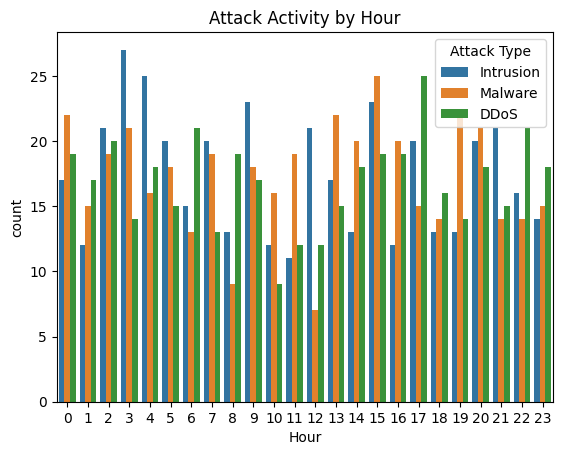

In [22]:
sns.countplot(x='Hour', hue='Attack Type', data=df)
plt.title("Attack Activity by Hour")
plt.show()


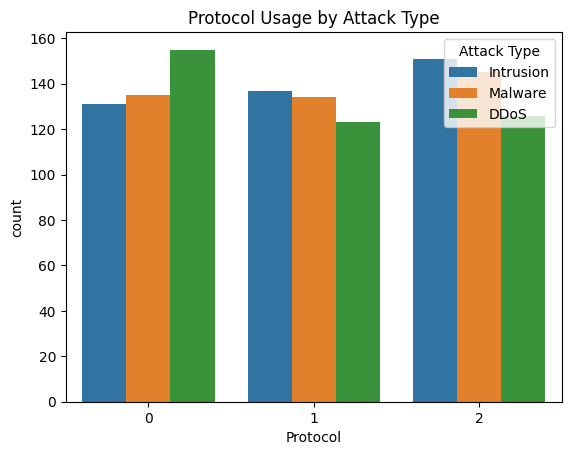

In [23]:
sns.countplot(x='Protocol', hue='Attack Type', data=df)
plt.title("Protocol Usage by Attack Type")
plt.show()


In [24]:
# Normalize important features to create a simple risk score
df['Risk Score'] = (
    df['Anomaly Scores'] * 0.5 +
    df['Packet Length'] * 0.003 +
    df['Source Port'] * 0.0001
)


In [25]:
df['Risk Level'] = pd.cut(
    df['Risk Score'],
    bins=[-1,40,70,1000],
    labels=['Low','Medium','High']
)


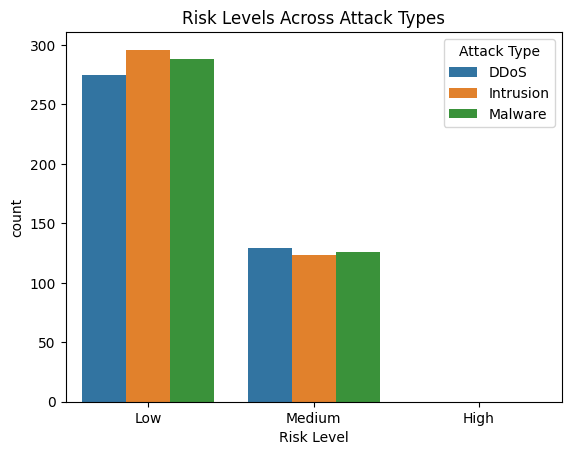

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Risk Level', hue='Attack Type', data=df)
plt.title("Risk Levels Across Attack Types")
plt.show()


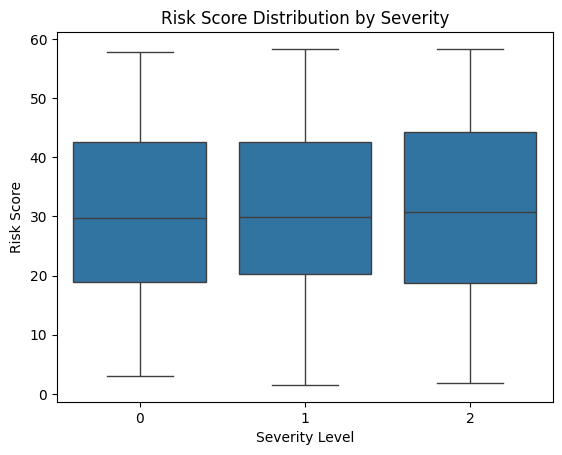

In [27]:
sns.boxplot(x='Severity Level', y='Risk Score', data=df)
plt.title("Risk Score Distribution by Severity")
plt.show()


In [28]:
# Count attacks per hour
attack_timeline = df.groupby(['Hour', 'Attack Type']).size().reset_index(name='Count')
attack_timeline.head()


,Hour,Attack Type,Count
0,0,DDoS,19
1,0,Intrusion,17
2,0,Malware,22
3,1,DDoS,17
4,1,Intrusion,12


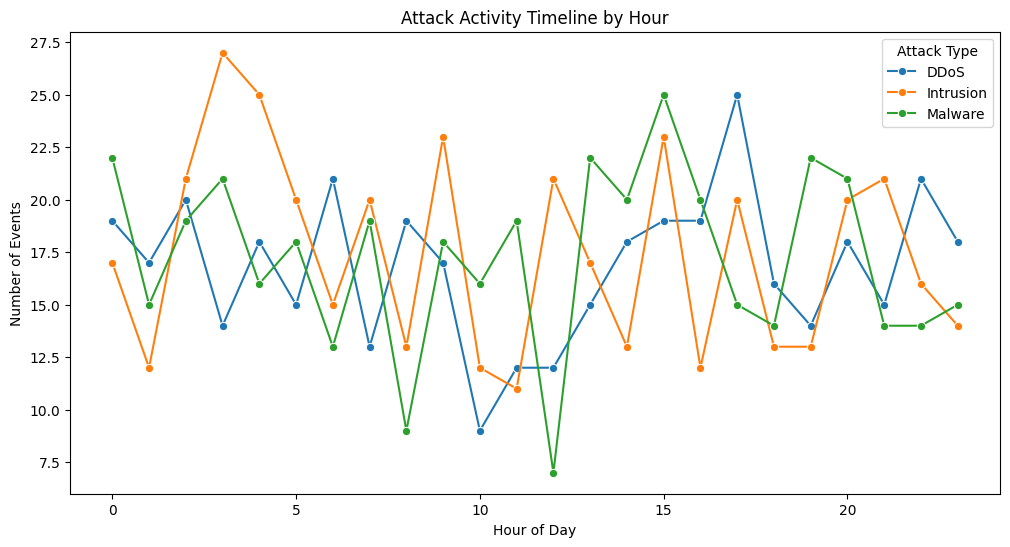

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.lineplot(data=attack_timeline, x='Hour', y='Count', hue='Attack Type', marker='o')
plt.title("Attack Activity Timeline by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Events")
plt.show()


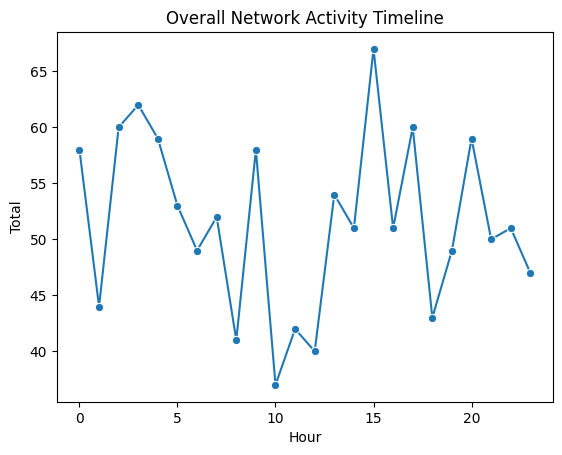

In [30]:
sns.lineplot(data=df.groupby('Hour').size().reset_index(name='Total'),
             x='Hour', y='Total', marker='o')
plt.title("Overall Network Activity Timeline")
plt.show()
